# Import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm
from scipy import stats
import math



In [3]:
sigma=1
def fx(x):
    return x**3*np.exp(-(x**2)/(2*sigma**2))

In [4]:
def montecarlo_integral(fun, a, b, N):
    x = np.random.uniform(a, b, N)
    intpartial = []
    for i in range(len(x)):
        intpartial.append(fun(x[i]))
    intarr = np.array(intpartial)
    return (b-a)*intarr.mean()

In [5]:
montecarlo_integral(fx,0,10000,1000000)

2.039322867043395

In [6]:
2*sigma**4

2

## New solution

In [7]:
sigma=10

In [8]:
#sample from a normal distribution


In [9]:
def integrale():
    px = np.random.normal(0,sigma,100000)
    pxabs = np.abs(px)
    return sigma*math.sqrt(2*math.pi)*0.5*(pxabs**3).mean()

In [10]:
integrale()

20055.55871587394

In [11]:
(2*sigma**4)/(sigma*math.sqrt(2*math.pi))

797.8845608028655

In [12]:
2*sigma**4

20000

# Lecture 4

In [13]:
from astroML.datasets import fetch_dr7_quasar

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

array([0.01673025])

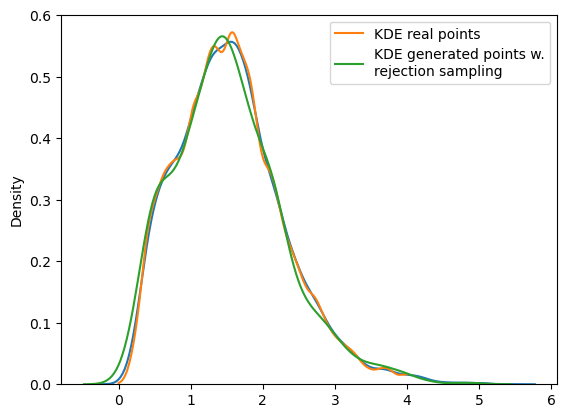

In [14]:
kde = stats.gaussian_kde(z,bw_method=0.1)
N=10000
xg = np.linspace(0,10,100)
ymax = 1
x = np.random.uniform(0,6,N)
y = np.random.uniform(0,ymax,N)


goodpoints = x[y<kde(x)]


sns.kdeplot(z)
x = np.linspace(0, 4, 1000)
plt.plot(x, kde.evaluate(x), label="KDE real points")
sns.kdeplot(goodpoints, label="KDE generated points w.\nrejection sampling")
plt.legend()
kde.pdf(0.1)

In [15]:
cumsu = stats.cumfreq(z, numbins=10)[0]

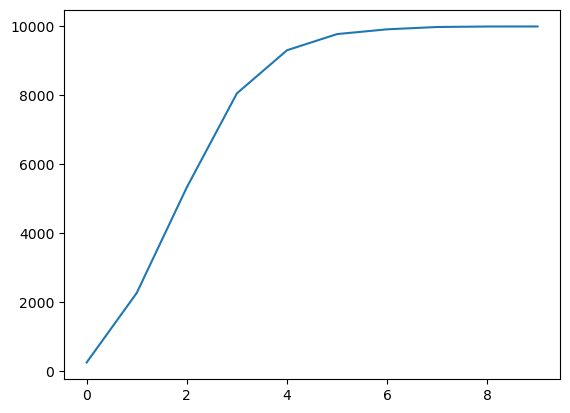

In [16]:
#plot cumsu
plt.plot(cumsu)

# L05

In [17]:
N=5
measurements = np.random.normal(1,0.2,N)
measurements=sorted(measurements)

In [18]:
likl=[]
x=np.linspace(0,3,1000)
for i in x:
    likl.append(stats.norm.pdf(measurements,i,0.2))


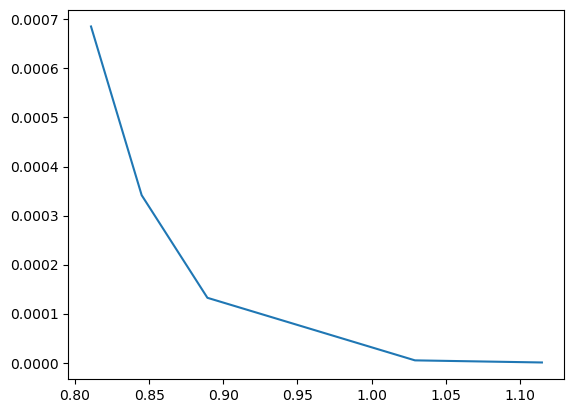

In [19]:
plt.plot(measurements,stats.norm.pdf(measurements,x[4],0.2))

In [20]:
loglikl=[]

for i in likl:
    loglikl.append((i).prod())

loglikl=np.array(loglikl)



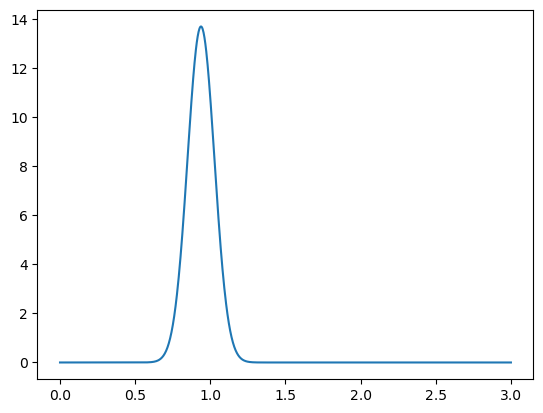

In [21]:
plt.plot(x,loglikl)

In [22]:
x[np.argmax(loglikl)]

0.9369369369369369

# Lecture 6

In [23]:
data = np.load("./solutions/formationchannels.npy")

In [24]:
data.shape

(2950, 1)

In [25]:
#fit data as gaussian mixture model
from sklearn.mixture import GaussianMixture
modelsgmm={}
for N in range(1,10):
    modelsgmm[N] = GaussianMixture(n_components=N, covariance_type='full').fit(data)





In [26]:
for m in modelsgmm.keys():
    print(f"GMM with {m} components AIC: {modelsgmm[m].aic(data)}")


GMM with 1 components AIC: 20945.972608590197
GMM with 2 components AIC: 20753.41195568149
GMM with 3 components AIC: 20669.591357779107
GMM with 4 components AIC: 20103.501899709256
GMM with 5 components AIC: 20112.350911866866
GMM with 6 components AIC: 20120.464213386105
GMM with 7 components AIC: 20128.546482618243
GMM with 8 components AIC: 20132.80561220174
GMM with 9 components AIC: 20135.45599843579


(array([0.00063165, 0.        , 0.00063165, 0.00063165, 0.00063165,
        0.        , 0.00126329, 0.00189494, 0.00126329, 0.00063165,
        0.00252658, 0.00063165, 0.00189494, 0.00442152, 0.00378987,
        0.0069481 , 0.00252658, 0.0069481 , 0.00568481, 0.00947468,
        0.00821139, 0.00568481, 0.0069481 , 0.01200126, 0.01200126,
        0.0069481 , 0.01010633, 0.01073797, 0.01200126, 0.00757974,
        0.00884304, 0.00884304, 0.00568481, 0.00947468, 0.00821139,
        0.00252658, 0.00757974, 0.00631645, 0.00189494, 0.00315823,
        0.00505316, 0.00884304, 0.01452784, 0.02526582, 0.04547847,
        0.07390251, 0.09158858, 0.08148226, 0.06569112, 0.03221392,
        0.02400253, 0.01642278, 0.03031898, 0.0277924 , 0.02968733,
        0.02968733, 0.03221392, 0.04611011, 0.03726708, 0.05053163,
        0.04358353, 0.04737341, 0.04926834, 0.05368986, 0.05179492,
        0.0555848 , 0.0543215 , 0.05305821, 0.05053163, 0.04484682,
        0.05495315, 0.03663543, 0.03600379, 0.04

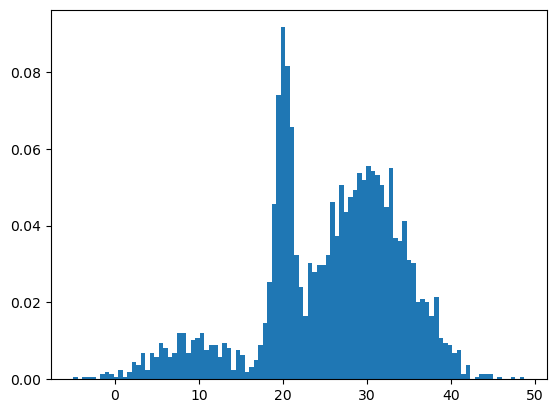

In [27]:
plt.hist(data, bins=100, density=True)

In [28]:
newdata = np.arange(-5,50,0.2).reshape(-1,1)

In [29]:
bestmodel=modelsgmm[3]

In [30]:
belonging = bestmodel.predict(newdata)

In [31]:
bestmodel.predict_proba(np.array([2]).reshape(-1,1))

array([[1.64788330e-04, 9.99835212e-01, 1.12513702e-15]])

In [32]:
probabs = bestmodel.predict_proba(newdata)

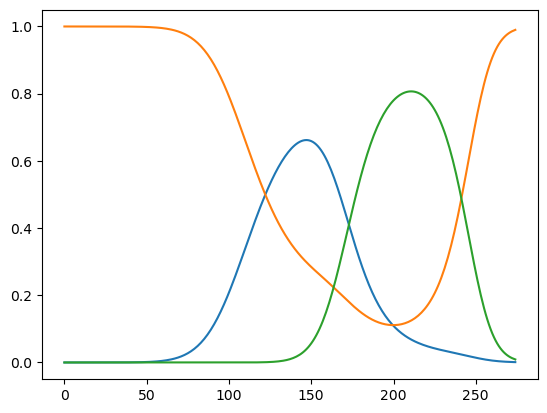

In [33]:
plt.plot(probabs)

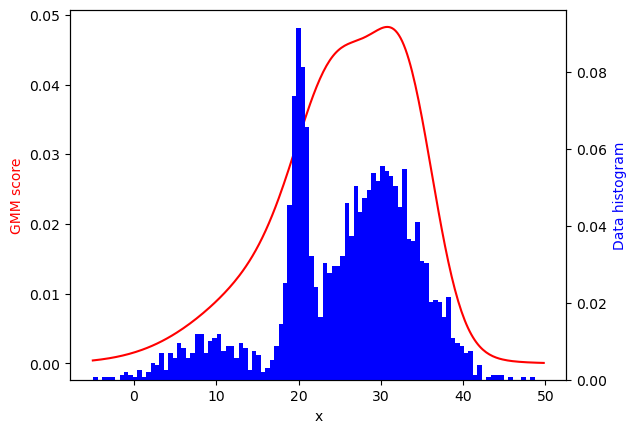

In [34]:

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(newdata, np.exp(bestmodel.score_samples(newdata)), color='red')
ax2.hist(data, bins=100, density=True, color='blue')
ax1.set_xlabel('x')
ax1.set_ylabel('GMM score', color='red')
ax2.set_ylabel('Data histogram', color='blue')
plt.show()


In [35]:
#return best model variance for each gaussian
bestmodel.covariances_

array([[[23.83386944]],

       [[86.48313924]],

       [[13.07955077]]])

In [36]:
#return mean for each gaussian
bestmodel.means_

array([[25.11959996],
       [19.74915643],
       [33.10368263]])

# Lez 7

In [37]:
def draw(N,sig):
    np.random.seed(10191)
    M = np.random.normal(1,sig,N)
    chi = np.random.uniform(0,1,N)
    return M * np.sqrt((1+np.sqrt(1-chi**2))/2),M
m_irr,M = draw(100,0.02)
f = m_irr/M

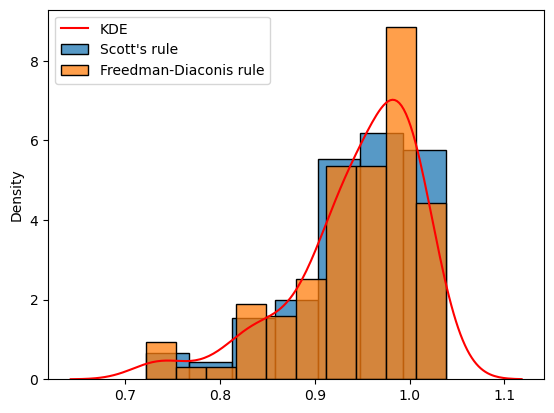

In [38]:
sns.histplot(m_irr, bins='scott', kde=False, label="Scott's rule",stat="density")
sns.histplot(m_irr, bins='fd', kde=False, label="Freedman-Diaconis rule",stat="density")
sns.kdeplot(m_irr, label="KDE", color="red")
plt.legend()


In [39]:
#use Kolmogorov-Smirnov test to compare distributions m_irr and M
stats.ks_2samp(m_irr,M)

KstestResult(statistic=0.52, pvalue=1.070075869779788e-12, statistic_location=0.9788137554998401, statistic_sign=1)

In [40]:
res=[]
for sigma in np.arange(0,1,0.01):
    m_irr,M = draw(1000,sigma)
    res.append((sigma,stats.ks_2samp(m_irr,M)))

In [41]:
stats.ks_2samp(m_irr,M)

KstestResult(statistic=0.042, pvalue=0.34112475112661245, statistic_location=1.3740396023176897, statistic_sign=1)

Text(0, 0.5, 'p-value of KS test')

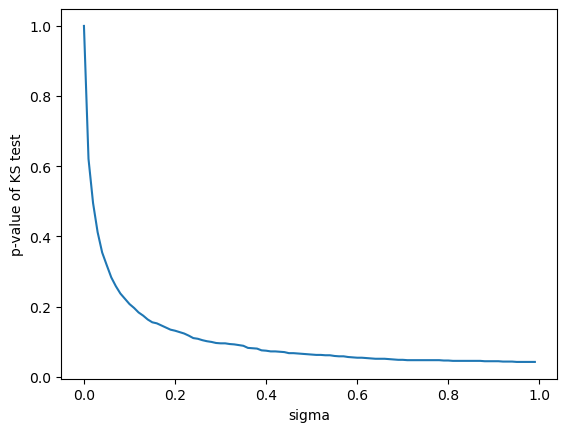

In [42]:
plt.plot([i[0] for i in res],[i[1][0] for i in res])
plt.xlabel("sigma")
plt.ylabel("p-value of KS test")

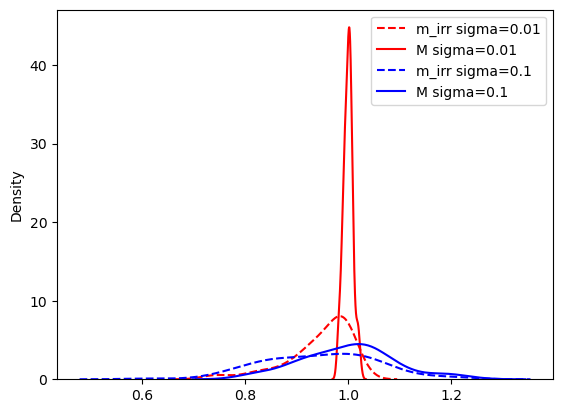

In [43]:
m_irr,M=draw(100,0.01)
sns.kdeplot(m_irr, label="m_irr sigma=0.01",color="red",linestyle="--")
sns.kdeplot(M, label="M sigma=0.01",color="red",linestyle="-")
m_irr,M=draw(100,0.1)
sns.kdeplot(m_irr, label="m_irr sigma=0.1",color="blue",linestyle="--")
sns.kdeplot(M, label="M sigma=0.1",color="blue",linestyle="-")

plt.legend()

# Lez 13

In [4]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys())

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [15]:
np.random.seed(42)
mychoices = np.random.choice(digits.images.shape[0],1000)
myimages=digits.images[mychoices]
myimages=digits.images

In [16]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
myimages_reshaped=myimages.reshape(myimages.shape[0],-1)

iso.fit(myimages_reshaped)

data_projected = iso.transform(myimages_reshaped)


<Axes: >

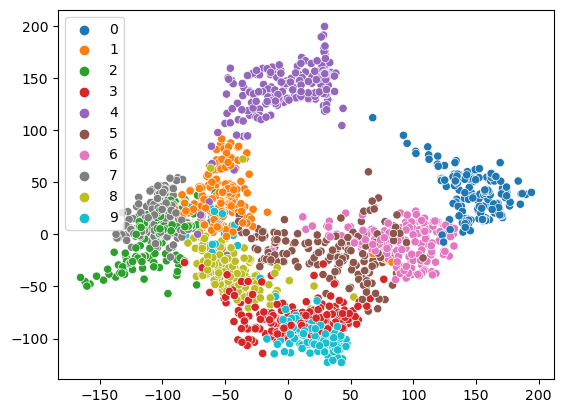

In [18]:
sns.scatterplot(x=data_projected[:,0],y=data_projected[:,1],hue=digits.target,palette="tab10")

In [19]:
data_projected.shape

(1797, 2)

In [36]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(myimages_reshaped, digits.target, random_state=2,train_size=0.8)
print(Xtrain.shape, Xtest.shape)


(1437, 64) (360, 64)


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
classif = LogisticRegression(random_state=2,solver="sag")
classif.fit(Xtrain, ytrain)
metrics.accuracy_score(ytest,classif.predict(Xtest))


0.9527777777777777

In [44]:
for ndim in range(1,10):
    iso_red=Isomap(n_components=ndim)
    myimages_reshaped=myimages.reshape(myimages.shape[0],-1)

    iso_red.fit(myimages_reshaped)


    data_projected_red = iso_red.transform(myimages_reshaped)
    print(data_projected_red.shape)
    Xtrain_red, Xtest_red, ytrain_red, ytest_red = train_test_split(data_projected_red, digits.target, random_state=2,train_size=0.8)

    classif_red = LogisticRegression(penalty='l2',max_iter=2000,solver="sag")
    classif_red.fit(Xtrain_red, ytrain_red)
    print(ndim,metrics.accuracy_score(ytest_red,classif_red.predict(Xtest_red)))



(1797, 1)
1 0.3888888888888889
(1797, 2)
2 0.65
(1797, 3)
3 0.8222222222222222
(1797, 4)
4 0.8666666666666667
(1797, 5)
5 0.95
(1797, 6)
6 0.9638888888888889
(1797, 7)
7 0.9694444444444444
(1797, 8)
8 0.9722222222222222
(1797, 9)
9 0.9666666666666667


## Random seed finding

In [29]:
myguess=np.array([8,9,8,4,2,6,9,4,9,4,0,6,1,7,6,9,5,4,4,8,4,0,5,6,6,7,9,3,2,6,0,8,3,9,6,1,6,2,0,5,4,4,9,6,2,6,1,0,0])
sim = 0
best_rnd = 0
for rnd in range(1000000):
    np.random.seed(rnd)
    mychoices = np.random.choice(digits.images.shape[0],49)
    seedtruth=digits.target[mychoices]
    if np.sum(myguess==seedtruth)/49 > sim:
        sim = np.sum(myguess==seedtruth)/49
        best_rnd = rnd
print(f"Most likely random seed: {best_rnd}, guess accuracy: {sim}")


Most likely random seed: 4321, guess accuracy: 0.8775510204081632


In [30]:
np.random.seed(4321)
mychoices = np.random.choice(digits.images.shape[0],49)

seedtruth=digits.target[mychoices]
seedtruth

array([8, 9, 8, 1, 2, 6, 9, 1, 9, 4, 0, 6, 1, 7, 6, 9, 5, 4, 4, 8, 4, 0,
       5, 6, 8, 9, 9, 3, 2, 1, 0, 8, 3, 9, 6, 1, 1, 2, 0, 5, 4, 4, 9, 6,
       2, 6, 1, 0, 0])

In [31]:
seedtruth.reshape(7,7)

array([[8, 9, 8, 1, 2, 6, 9],
       [1, 9, 4, 0, 6, 1, 7],
       [6, 9, 5, 4, 4, 8, 4],
       [0, 5, 6, 8, 9, 9, 3],
       [2, 1, 0, 8, 3, 9, 6],
       [1, 1, 2, 0, 5, 4, 4],
       [9, 6, 2, 6, 1, 0, 0]])

In [33]:
for i in range(49):
    if myguess[i]!=seedtruth[i]:
        print(f"Error in position: {((i+1)//7)+1},{(i+1)%7} guessed: {myguess[i]}, truth: {seedtruth[i]}")
        
        

Error in position: 1,4 guessed: 4, truth: 1
Error in position: 2,1 guessed: 4, truth: 1
Error in position: 4,4 guessed: 6, truth: 8
Error in position: 4,5 guessed: 7, truth: 9
Error in position: 5,2 guessed: 6, truth: 1
Error in position: 6,2 guessed: 6, truth: 1


# Lez 14

In [2]:
import requests

# Download file
r = requests.get('https://user-web.icecube.wisc.edu/~grbweb_public/Summary_table.txt')
with open("Summary_table.txt", 'wb') as f:
    f.write(r.content)

# Read content
data = np.loadtxt("Summary_table.txt", dtype='str',unpack='True')

# Read headers
with open("Summary_table.txt",'r') as f:
    names= np.array([n.strip().replace(" ","_") for n in f.readlines()[1].replace("#","").replace("\n","").lstrip().split('    ') if n.strip()!=''])

In [3]:
T90=np.array(data[6],dtype=float)
print(T90)

[  9.728 111.75    0.256 ...   3.136 208.576   5.184]


In [4]:
#filter T90 for values higher then -999
T90=T90[T90>-999]

In [16]:
T90[T90>1000]

array([1088.   , 2100.   , 1307.008])

<Axes: ylabel='Density'>

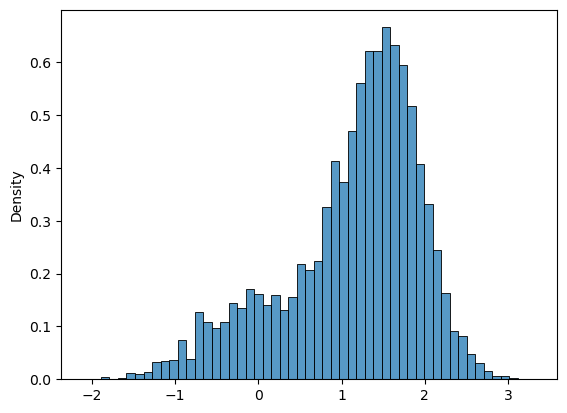

In [5]:

sns.histplot(np.log10(T90), bins='fd', kde=False, label="Freedman-Diaconis rule",stat="density")

/Users/zavidos/mambaforge/envs/pymc311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/zavidos/mambaforge/envs/pymc311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/zavidos/mambaforge/envs/pymc311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/zavidos/mambaforge/envs/pymc311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

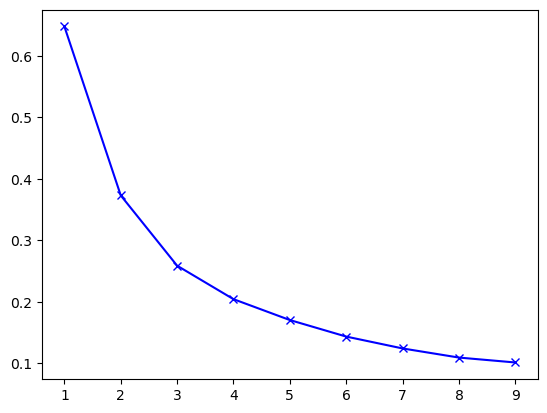

In [6]:
#cluster T90 with k-means in a for loop and perform elbow method
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

# create new plot and data
plt.plot()
X = np.array(list(zip(np.log10(T90),np.zeros(len(T90)))), dtype=np.float32)


# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

#plot elbow method
plt.plot(K, distortions, 'bx-')



/Users/zavidos/mambaforge/envs/pymc311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


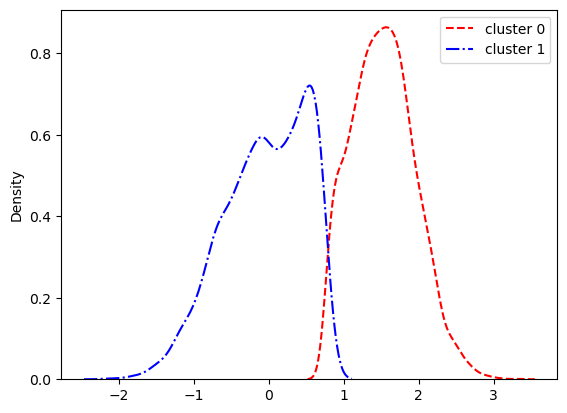

In [7]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

sns.kdeplot(np.log10(T90)[y_kmeans==0], label="cluster 0",color="red",linestyle="--")
sns.kdeplot(np.log10(T90)[y_kmeans==1], label="cluster 1",color="blue",linestyle="-.")
plt.legend()



/Users/zavidos/mambaforge/envs/pymc311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


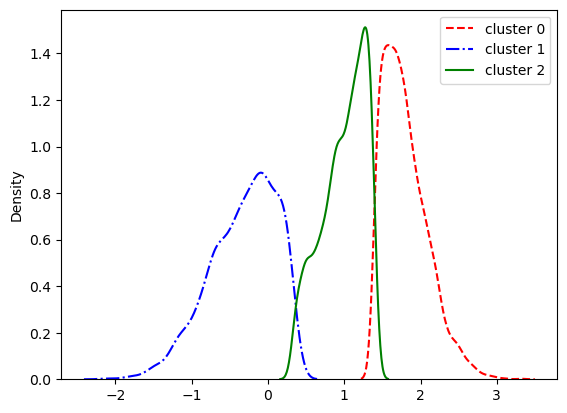

In [8]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
sns.kdeplot(np.log10(T90)[y_kmeans==0], label="cluster 0",color="red",linestyle="--")
sns.kdeplot(np.log10(T90)[y_kmeans==1], label="cluster 1",color="blue",linestyle="-.")
sns.kdeplot(np.log10(T90)[y_kmeans==2], label="cluster 2",color="green",linestyle="-")
plt.legend()



In [9]:
#use meanshift to cluster T90
from sklearn.cluster import MeanShift, estimate_bandwidth
X=np.log10(T90).reshape(-1,1)
bandwidth = estimate_bandwidth(X,quantile=0.2)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print(f"number of estimated clusters : {n_clusters_}")


number of estimated clusters : 2


In [10]:
bandwidth

0.3687516991657019

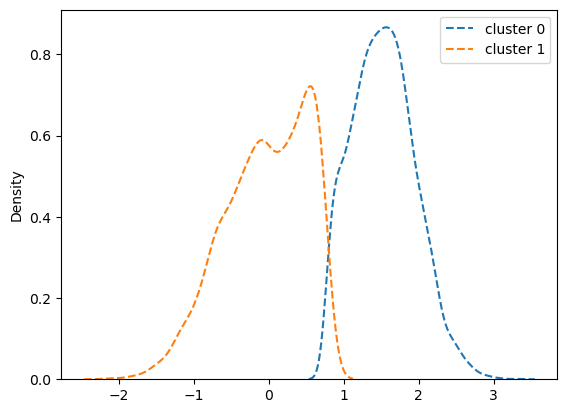

In [11]:
#plot a kde of T90 for each cluster
for i in range(n_clusters_):
    sns.kdeplot(np.log10(T90)[labels==i], label=f"cluster {i}",linestyle="--")
plt.legend()

    


In [12]:

df=pd.DataFrame(data=data[1:].T,columns=names[1:])
df

,GRB_name_Fermi,T0,ra,decl,pos_error,T90,T90_error,T90_start,fluence,fluence_error,redshift,'T100',GBM_located,mjd_(T0)
0,GRB230421405,9:42:41.253,44.5500,5.9600,4.979385,9.7280,3.6200,9:42:41.253,9.7606e-07,3.5727e-08,-999,9.7280,True,60055.40464413
1,None,10:19:01,161.0482,32.1077,0.000259,111.7500,-999,10:19:01,2.7000e-06,-999,-999,111.7500,False,60054.42987269
2,GRB230419568,13:37:43.335,322.3700,-19.0900,13.759342,0.2560,0.1810,13:37:43.335,2.6722e-07,1.6210e-08,-999,0.2560,True,60053.56786267
3,GRB230418883,21:11:33.462,47.4400,-12.4600,-999,0.2560,0.0720,21:11:33.462,2.3673e-06,1.2482e-08,-999,0.2560,True,60052.88302618
4,GRB230415867,20:48:45.304,149.5600,-10.7600,3.609451,40.4490,3.5660,20:48:45.304,4.5480e-06,5.9224e-08,-999,40.4490,True,60049.86719102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8110,None,5:33:13.716,335.9500,25.7667,4.790000,430.0160,1.0940,5:33:13.716,1.3510e-06,6.3429e-08,-999,430.0160,False,48371.23140875
8111,None,0:37:45.700,91.3000,-22.7667,1.020000,90.1760,0.2860,0:37:49.924,1.3277e-05,6.8674e-08,-999,94.4000,False,48371.02622338
8112,None,19:43:25.064,201.3000,-45.4167,13.780000,3.1360,0.5900,19:43:25.064,2.4858e-08,1.0496e-08,-999,3.1360,False,48370.82181787
8113,None,19:51:15.804,193.4750,-8.3833,11.100000,208.5760,1.1180,19:51:15.804,1.6510e-07,1.7015e-08,-999,208.5760,False,48369.82726625


In [13]:

df_nored=df[(df['T90'].astype(float)>0) & (df['fluence'].astype(float)>0) & (df['fluence'].astype(float)<0.001)] #(df['redshift']!="-999") &
df_nored

,GRB_name_Fermi,T0,ra,decl,pos_error,T90,T90_error,T90_start,fluence,fluence_error,redshift,'T100',GBM_located,mjd_(T0)
0,GRB230421405,9:42:41.253,44.5500,5.9600,4.979385,9.7280,3.6200,9:42:41.253,9.7606e-07,3.5727e-08,-999,9.7280,True,60055.40464413
1,None,10:19:01,161.0482,32.1077,0.000259,111.7500,-999,10:19:01,2.7000e-06,-999,-999,111.7500,False,60054.42987269
2,GRB230419568,13:37:43.335,322.3700,-19.0900,13.759342,0.2560,0.1810,13:37:43.335,2.6722e-07,1.6210e-08,-999,0.2560,True,60053.56786267
3,GRB230418883,21:11:33.462,47.4400,-12.4600,-999,0.2560,0.0720,21:11:33.462,2.3673e-06,1.2482e-08,-999,0.2560,True,60052.88302618
4,GRB230415867,20:48:45.304,149.5600,-10.7600,3.609451,40.4490,3.5660,20:48:45.304,4.5480e-06,5.9224e-08,-999,40.4490,True,60049.86719102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8110,None,5:33:13.716,335.9500,25.7667,4.790000,430.0160,1.0940,5:33:13.716,1.3510e-06,6.3429e-08,-999,430.0160,False,48371.23140875
8111,None,0:37:45.700,91.3000,-22.7667,1.020000,90.1760,0.2860,0:37:49.924,1.3277e-05,6.8674e-08,-999,94.4000,False,48371.02622338
8112,None,19:43:25.064,201.3000,-45.4167,13.780000,3.1360,0.5900,19:43:25.064,2.4858e-08,1.0496e-08,-999,3.1360,False,48370.82181787
8113,None,19:51:15.804,193.4750,-8.3833,11.100000,208.5760,1.1180,19:51:15.804,1.6510e-07,1.7015e-08,-999,208.5760,False,48369.82726625


In [14]:
#cluster data using k-mean based on T90 and fluence
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_nored[['T90']])
df_nored['cluster']=kmeans.labels_
df_nored

/Users/zavidos/mambaforge/envs/pymc311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/9h/wspygsdd64nc8w1bt957q7t40000gn/T/ipykernel_52073/2686549581.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nored['cluster']=kmeans.labels_


,GRB_name_Fermi,T0,ra,decl,pos_error,T90,T90_error,T90_start,fluence,fluence_error,redshift,'T100',GBM_located,mjd_(T0),cluster
0,GRB230421405,9:42:41.253,44.5500,5.9600,4.979385,9.7280,3.6200,9:42:41.253,9.7606e-07,3.5727e-08,-999,9.7280,True,60055.40464413,0
1,None,10:19:01,161.0482,32.1077,0.000259,111.7500,-999,10:19:01,2.7000e-06,-999,-999,111.7500,False,60054.42987269,2
2,GRB230419568,13:37:43.335,322.3700,-19.0900,13.759342,0.2560,0.1810,13:37:43.335,2.6722e-07,1.6210e-08,-999,0.2560,True,60053.56786267,0
3,GRB230418883,21:11:33.462,47.4400,-12.4600,-999,0.2560,0.0720,21:11:33.462,2.3673e-06,1.2482e-08,-999,0.2560,True,60052.88302618,0
4,GRB230415867,20:48:45.304,149.5600,-10.7600,3.609451,40.4490,3.5660,20:48:45.304,4.5480e-06,5.9224e-08,-999,40.4490,True,60049.86719102,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8110,None,5:33:13.716,335.9500,25.7667,4.790000,430.0160,1.0940,5:33:13.716,1.3510e-06,6.3429e-08,-999,430.0160,False,48371.23140875,1
8111,None,0:37:45.700,91.3000,-22.7667,1.020000,90.1760,0.2860,0:37:49.924,1.3277e-05,6.8674e-08,-999,94.4000,False,48371.02622338,2
8112,None,19:43:25.064,201.3000,-45.4167,13.780000,3.1360,0.5900,19:43:25.064,2.4858e-08,1.0496e-08,-999,3.1360,False,48370.82181787,0
8113,None,19:51:15.804,193.4750,-8.3833,11.100000,208.5760,1.1180,19:51:15.804,1.6510e-07,1.7015e-08,-999,208.5760,False,48369.82726625,2


<Axes: xlabel='T90', ylabel='fluence'>

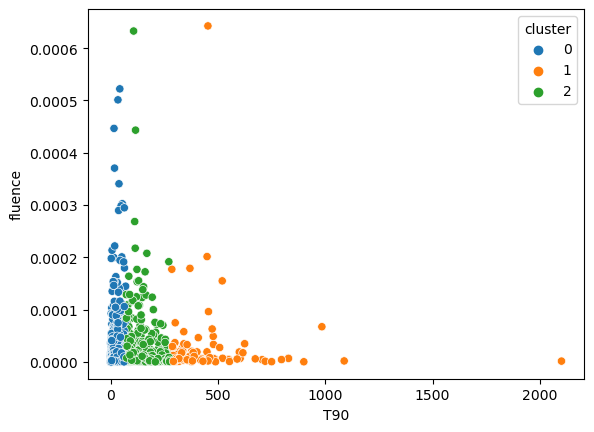

In [15]:
#plot the clusters
sns.scatterplot(x=df_nored['T90'].astype(float),y=df_nored['fluence'].astype(float),hue=df_nored['cluster'],palette="tab10")

# Lez 17

In [134]:
from astroML.datasets import generate_mu_z
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

(35.0, 50.0)

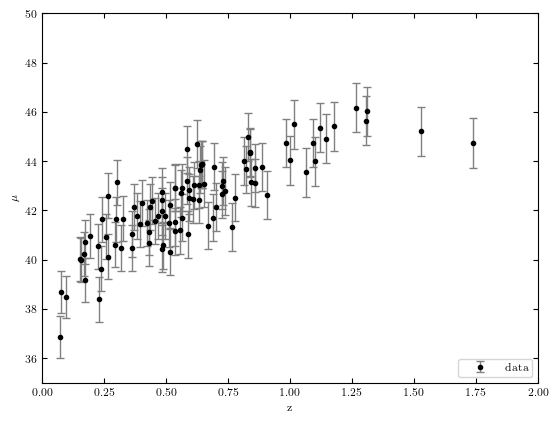

In [135]:
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

In [136]:
z_sample.reshape(-1,1).shape

(100, 1)

0.7200816493667105

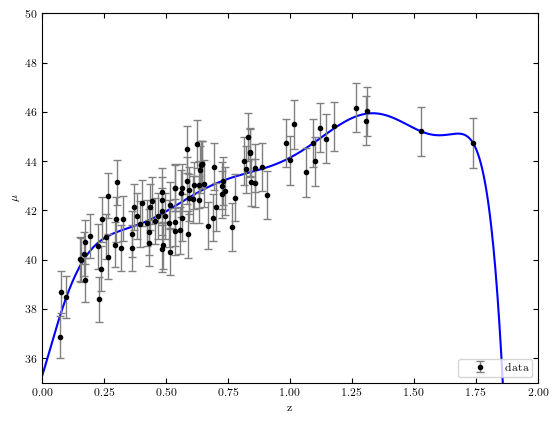

In [137]:
#using polynomialregression from astroML fit the data with crossvalidation K=4
from astroML.linear_model import PolynomialRegression
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error


#set up polynomial regression of kf
polyreg = PolynomialRegression(9)
polyreg.fit(z_sample.reshape(-1,1),mu_sample)
#plot the fit
z_fit = np.linspace(0, 2, 1000)
mu_fit = polyreg.predict(z_fit[:, None])
plt.plot(z_fit, mu_fit, '-b')
#plot the data
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)
#calculate the mean squared error
mean_squared_error(mu_sample,polyreg.predict(z_sample.reshape(-1,1)))






In [138]:
grandmean_mse=[]

for p in range(10):
    polyreg = PolynomialRegression(p)

    kf = KFold(n_splits=100,shuffle=True,random_state=1234)
    mse=[]
    mae=[]
    r2=[]
    for train_index, test_index in kf.split(z_sample):
        X_train, X_test = z_sample[train_index], z_sample[test_index]
        y_train, y_test = mu_sample[train_index], mu_sample[test_index]
        polyreg.fit(X_train.reshape(-1,1),y_train)
        y_pred=polyreg.predict(X_test.reshape(-1,1))
        mse.append(mean_squared_error(y_test,y_pred))
    print(f"MSE with polynomial fit of grade {p} : {np.mean(mse)}")
    grandmean_mse.append(np.mean(mse))

  




MSE with polynomial fit of grade 0 : 3.2608972929063653
MSE with polynomial fit of grade 1 : 1.0385089662439602
MSE with polynomial fit of grade 2 : 0.8719045491423068
MSE with polynomial fit of grade 3 : 0.9394799121404184
MSE with polynomial fit of grade 4 : 0.913790211811062
MSE with polynomial fit of grade 5 : 0.8269764016417817
MSE with polynomial fit of grade 6 : 4.023406582835426
MSE with polynomial fit of grade 7 : 0.8765303597896223
MSE with polynomial fit of grade 8 : 12.180011184446707
MSE with polynomial fit of grade 9 : 31.40453275288483


In [139]:
grandmean_mse[3]

0.9394799121404184

array([   35.26610351,    32.52717374,    84.29772043, -1185.19631621,
        4221.82035283, -7581.90261615,  7725.37965821, -4516.73127643,
        1411.30781043,  -182.62797455])

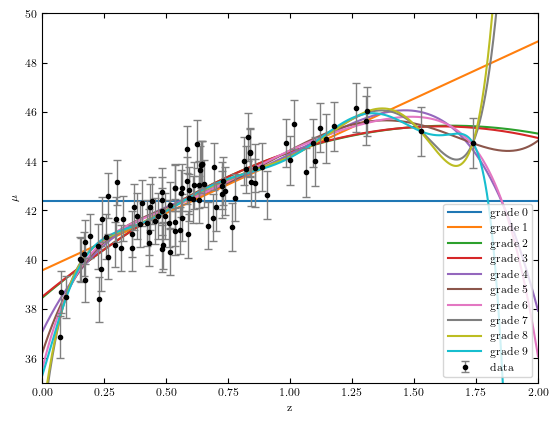

In [150]:
#fit the data with polynomial fit from grade 3 to 7 and plot all the fits with different colors and add legend
for p in range(10):
    polyreg = PolynomialRegression(p)
    polyreg.fit(z_sample.reshape(-1,1),mu_sample)
    z_fit = np.linspace(0, 2, 1000)
    mu_fit = polyreg.predict(z_fit[:, None])
    plt.plot(z_fit, mu_fit, label=f"grade {p}")
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)
polyreg.coef_



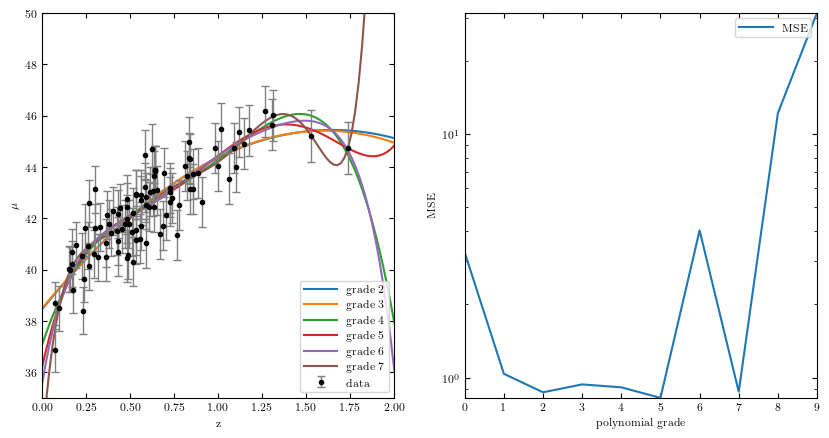

In [141]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
#plot the data
for p in range(2,8):
    polyreg = PolynomialRegression(p)
    polyreg.fit(z_sample.reshape(-1,1),mu_sample)
    z_fit = np.linspace(0, 2, 100)
    mu_fit = polyreg.predict(z_fit[:, None])
    ax[0].plot(z_fit, mu_fit, label=f"grade {p}")
ax[0].errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
ax[0].legend(loc='lower right')
#change x limit for ax[0]
ax[0].set_xlim(0,2)
ax[0].set_ylim(35,50)
ax[0].set_xlabel("z")
ax[0].set_ylabel("$\mu$")
#plot grandmean_mse as a scatterplot using same colors as the fits
ax[1].plot(range(10),grandmean_mse,label="MSE")
ax[1].set_xlabel("polynomial grade")
ax[1].set_ylabel("MSE")
ax[1].legend(loc='upper right')
#change y axis to log scale
ax[1].set_yscale('log')
#save figure
plt.savefig("polynomialfit.pdf")





In [146]:
polyreg.coef_

array([   33.0388866 ,    88.36455436,  -419.10465978,  1070.05460078,
       -1505.50746677,  1174.27289712,  -473.67088511,    76.75032208])

## Trying with a NN

In [92]:
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

Epoch [5000/40000], Loss: 1.3730, val_loss: 1.5588
Epoch [10000/40000], Loss: 0.8318, val_loss: 1.0241
Epoch [15000/40000], Loss: 0.7990, val_loss: 0.9701
Epoch [20000/40000], Loss: 0.7961, val_loss: 0.9642
Early stopping at epoch 22300


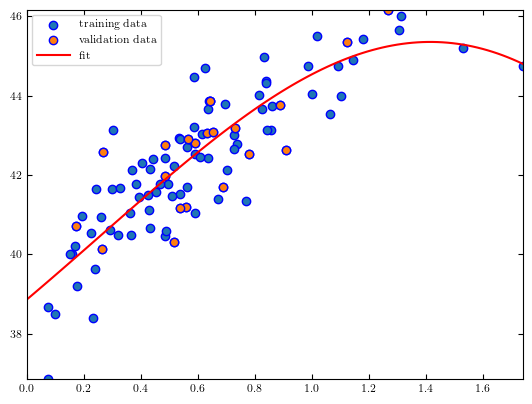

In [113]:
class PolynomialRegression(nn.Module):
    def __init__(self, p):
        super(PolynomialRegression, self).__init__()
        self.linear = nn.Linear(p + 1, 1)

    def forward(self, x):
        out = torch.cat([x ** i for i in range(p + 1)], 1)
        out = self.linear(out)
        return out

# Convert data to tensors and set up variables
x = torch.from_numpy(z_sample).float()
y = torch.from_numpy(mu_sample).float()
x = x.unsqueeze(1) # add an extra dimension
y = y.unsqueeze(1) # add an extra dimension

# Divide data into train and validation sets
n_train = int(0.8 * len(x))
x_train, y_train = x[:n_train], y[:n_train]
x_val, y_val = x[n_train:], y[n_train:]

# Set up the model and optimizer
p = 5 # polynomial order
model = PolynomialRegression(p)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Train the model
num_epochs = 40000
best_loss = float('inf')
patience = 20
count = 0
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 100 == 0:
        with torch.no_grad():
            val_outputs = model(x_val)
            val_loss = criterion(val_outputs, y_val)
            if val_loss.item() < best_loss:
                best_loss = val_loss.item()
                count = 0
            else:
                count += 1
                if count >= patience:
                    print('Early stopping at epoch', epoch+1)
                    break

    if (epoch + 1) % 5000 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}, val_loss: {:.4f}'.format(epoch+1, num_epochs, loss.item(),val_loss.item()))

# Plot the results
import matplotlib.pyplot as plt

x_test = torch.linspace(0, max(x).item(), 100).unsqueeze(1) # generate test input
y_pred = model(x_test)
plt.scatter(x.numpy(), y.numpy(), label='training data')
plt.scatter(x_val.numpy(), y_val.numpy(), label='validation data')
plt.plot(x_test.numpy(), y_pred.detach().numpy(), 'r-', label='fit')
plt.legend()
plt.show()

### Try with CV on different polynomial orders

In [128]:
class PolynomialRegression(nn.Module):
    def __init__(self, p):
        super(PolynomialRegression, self).__init__()
        self.linear = nn.Linear(p + 1, 1)

    def forward(self, x):
        out = torch.cat([x ** i for i in range(p + 1)], 1)
        out = self.linear(out)
        return out
grandmean_mse_nn=[]

mse=[]
kf = KFold(n_splits=10,shuffle=True,random_state=1234)
for p in range(10):
    print("\np =",p)
    fold=0
    for train_index, test_index in kf.split(z_sample):
        fold+=1
        X_train, x_val = z_sample[train_index], z_sample[test_index]
        y_train, y_val = mu_sample[train_index], mu_sample[test_index]
        x_train=torch.from_numpy(X_train).float()
        y_train=torch.from_numpy(y_train).float()
        x_val=torch.from_numpy(x_val).float()
        y_val=torch.from_numpy(y_val).float()
        x_train = x_train.unsqueeze(1)
        y_train = y_train.unsqueeze(1)
        x_val = x_val.unsqueeze(1) 
        y_val = y_val.unsqueeze(1)
        model = PolynomialRegression(p)
        
        #define weights initialization function
        def weights_init(m):
            if isinstance(m, nn.Linear):
                torch.nn.init.xavier_uniform_(m.weight)
                m.bias.data.fill_(0.0)
        model.apply(weights_init)
        

        criterion = nn.MSELoss()
        optimizer = optim.SGD(model.parameters(), lr=0.001)

        # Train the model
        num_epochs = 80000
        best_loss = float('inf')
        patience = 1000
        count = 0
        for epoch in range(num_epochs):
            optimizer.zero_grad()
            outputs = model(x_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()
            if (epoch + 1) % 100 == 0:
                with torch.no_grad():
                    val_outputs = model(x_val)
                    val_loss = criterion(val_outputs, y_val)
                    if val_loss.item() < best_loss:
                        best_loss = val_loss.item()
                        count = 0
                    else:
                        count += 1
                        if count >= patience:
                            print('Early stopping at epoch', epoch+1)
                            break

            if (epoch + 1) % 80000 == 0:
                print(f"Fold: {fold};",'Epoch [{}/{}], Loss: {:.4f}, val_loss: {:.4f}'.format(epoch+1, num_epochs, loss.item(),val_loss.item()))
        with torch.no_grad():
            y_pred = model(x_val)
        mse.append(mean_squared_error(y_val,y_pred))
    print(f"MSE with polynomial fit of grade {p} : {np.mean(mse)}")
    grandmean_mse_nn.append(np.mean(mse))



p = 0
Fold: 1; Epoch [80000/80000], Loss: 3.1441, val_loss: 3.6779
Fold: 2; Epoch [80000/80000], Loss: 3.2959, val_loss: 2.3313
Fold: 3; Epoch [80000/80000], Loss: 3.4244, val_loss: 1.1584
Fold: 4; Epoch [80000/80000], Loss: 3.2210, val_loss: 3.0040
Fold: 5; Epoch [80000/80000], Loss: 3.2846, val_loss: 2.3983
Fold: 6; Epoch [80000/80000], Loss: 3.0394, val_loss: 4.6868
Fold: 7; Epoch [80000/80000], Loss: 3.2192, val_loss: 3.1249
Fold: 8; Epoch [80000/80000], Loss: 3.1410, val_loss: 3.8613
Fold: 9; Epoch [80000/80000], Loss: 3.0137, val_loss: 4.8402
Fold: 10; Epoch [80000/80000], Loss: 3.1272, val_loss: 3.8203
MSE with polynomial fit of grade 0 : 3.2903473377227783

p = 1
Fold: 1; Epoch [80000/80000], Loss: 1.0137, val_loss: 0.6057
Fold: 2; Epoch [80000/80000], Loss: 0.9432, val_loss: 1.2445
Fold: 3; Epoch [80000/80000], Loss: 0.9943, val_loss: 0.8005
Fold: 4; Epoch [80000/80000], Loss: 0.9382, val_loss: 1.4003
Fold: 5; Epoch [80000/80000], Loss: 1.0114, val_loss: 0.6205
Fold: 6; Epoch

In [129]:
grandmean_mse_nn

[3.2903473,
 2.1605198,
 1.7341437,
 1.5162728,
 1.385678,
 1.3030299,
 1.2466863,
 1.2037523,
 1.1692392,
 1.1885514]

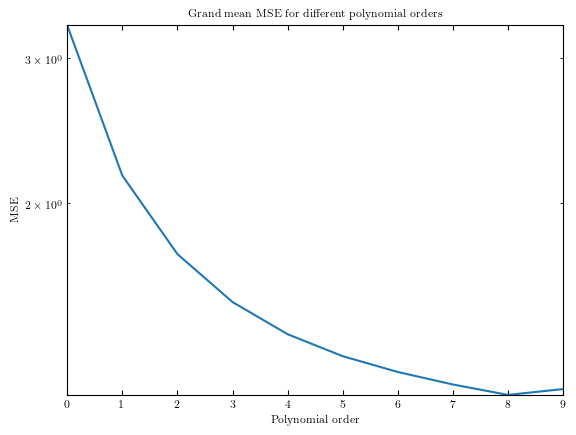

In [130]:
#plot grand mean mse
plt.plot(grandmean_mse_nn)
plt.xlabel("Polynomial order")
plt.ylabel("MSE")
plt.title("Grand mean MSE for different polynomial orders")
#set y as log
plt.yscale("log")
plt.show()

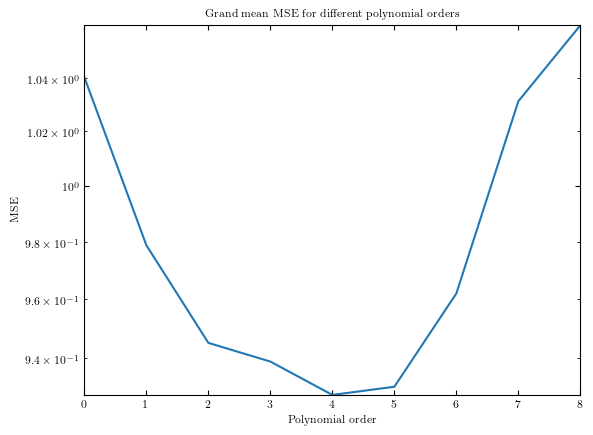

In [ ]:
#plot grand mean mse
plt.plot(grandmean_mse_nn)
plt.xlabel("Polynomial order")
plt.ylabel("MSE")
plt.title("Grand mean MSE for different polynomial orders")
#set y as log
plt.yscale("log")
plt.show()

# Lez 18

In [142]:
from sklearn.gaussian_process import GaussianProcessRegressor, kernels
from scipy.optimize import fmin_cobyla

In [151]:
from astroML.datasets import generate_mu_z
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

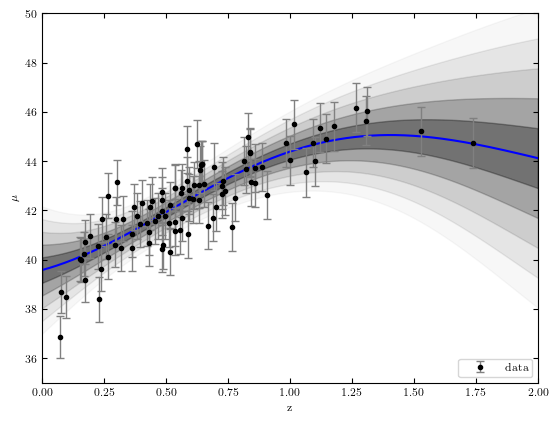

In [241]:
#perform a gaussianprocessregression with a squared exponential kernel
kernel = kernels.RBF(100)
gp = GaussianProcessRegressor(kernel=kernel,alpha=dmu ** 2,normalize_y=True)#,optimizer=None)
gp.fit(z_sample.reshape(-1,1), mu_sample)
z_fit = np.linspace(0, 2, 1000)
mu_fit, sigma = gp.predict(z_fit.reshape(-1,1), return_std=True)
plt.plot(z_fit, mu_fit, '-b')
plt.fill_between(z_fit, mu_fit - sigma, mu_fit + sigma,  color='k',alpha=0.3)
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)
#calculate the mean squared error
mean_squared_error(mu_sample,gp.predict(z_sample.reshape(-1,1)))
plt.fill_between(z_fit, mu_fit - 2*sigma, mu_fit + 2*sigma,  color='k',alpha=0.2)
plt.fill_between(z_fit, mu_fit - 3*sigma, mu_fit + 3*sigma,  color='k',alpha=0.1)
plt.fill_between(z_fit, mu_fit - 4*sigma, mu_fit + 4*sigma,  color='k',alpha=0.07)
plt.fill_between(z_fit, mu_fit - 5*sigma, mu_fit + 5*sigma,  color='k',alpha=0.03)




In [198]:
gp.kernel_


RBF(length_scale=0.683)